In [1]:
import pandas as pd  # Importing Pandas for data manipulation
import numpy as np  # Importing NumPy for numerical operations
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization

In [2]:
# Define the path to the dataset
dataset_path = '/content/netflix_titles.csv'

# Load the dataset using Pandas
movie_dataset = pd.read_csv(dataset_path)
df = movie_dataset.copy()

# Display the first few rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Display the shape of the dataframe (rows, columns)
print("Shape of the dataframe:", df.shape)

# Check data types of columns
print("Data types of columns:\n", df.dtypes)

Shape of the dataframe: (8807, 12)
Data types of columns:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [4]:
# Dropping unneeded features
df = df.drop(["show_id", "date_added"], axis=1) # Dropping unnecessary columns
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Handling missing data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')  # Imputer instance with most frequent strategy
df['director'] = imp.fit_transform(df[['director']])  # Imputing missing values in 'director' column
df.dropna(inplace=True)  # Dropping rows with any missing values
df.isna().sum()  # Checking if there are any remaining missing values

type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [6]:
# Display the 'duration' feature
print("Duration of shows:\n", df.duration.head())

Duration of shows:
 1    2 Seasons
4    2 Seasons
7      125 min
8    9 Seasons
9      104 min
Name: duration, dtype: object


In [7]:
# Extract unique units in the 'duration' feature
unique_durations = set([x[1] for x in list(df.duration.str.split())])
print("Unique durations:", unique_durations)

Unique durations: {'Season', 'Seasons', 'min'}


In [8]:
# Define a function to convert duration to minutes
def converting_to_minutes(duration):
    if "Season" in duration:
        num_seasons = int(duration.split()[0])
        return num_seasons * 400
    else:
        return int(duration.split()[0])

In [9]:
# Apply the function to the 'duration' column
df['duration'] = df['duration'].apply(converting_to_minutes)

# Display results after converting duration to minutes
print("Duration in minutes:\n", df['duration'])

Duration in minutes:
 1        800
4        800
7        125
8       3600
9        104
        ... 
8801      96
8802     158
8804      88
8805      88
8806     111
Name: duration, Length: 7299, dtype: int64


In [10]:
# Split data into features (X) and target (title)
X = df.drop('title', axis=1)
title = df['title']

In [11]:
# Import necessary preprocessing modules
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer

In [12]:
# Create instances of preprocessing classes
mms = MinMaxScaler()
ohe = OneHotEncoder(drop='first')
ctv = CountVectorizer()

# Create a preprocessing pipeline using make_column_transformer
preprocessor = make_column_transformer(
    (mms, ['release_year']),
    (mms, ['duration']),
    (ohe, ['type', 'director', 'rating']),
    (ctv, 'country'),
    (ctv, 'listed_in')
)

In [13]:
# Apply preprocessing to the features
X_processed = preprocessor.fit_transform(X)

# Convert the sparse matrix to a dense array
X_processed = X_processed.toarray()

In [14]:
# Install keras-tuner library
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.2 MB/s eta 0:00:00


In [15]:
# Import necessary modules for building and training models
from keras.metrics import cosine_similarity
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf

In [16]:
# Define a metric for testing the accuracy of reconstructed features
def cosine_similarity_metric(y_true, y_pred):
    return tf.reduce_mean(cosine_similarity(y_true, y_pred))

In [17]:
# Function for building different models using keras_tuner
def build_model(hp):
    input_shape = X_processed.shape[1]
    input_layer = Input(shape=(input_shape,))

    # Hyperparameters for model architecture
    outer_units = hp.Int('outer_units', min_value=128, max_value=256, step=64)
    inner_units = hp.Int('inner_units', min_value=32, max_value=128, step=32)
    bottleneck = hp.Int('bottleneck', min_value=8, max_value=32, step=8)

    # Build the model architecture
    hidden_layer1 = Dense(units=outer_units, activation='relu')(input_layer)
    hidden_layer2 = Dense(units=inner_units, activation='relu')(hidden_layer1)
    hidden_layer3 = Dense(units=bottleneck, activation='relu')(hidden_layer2)
    hidden_layer4 = Dense(units=inner_units, activation='relu')(hidden_layer3)
    hidden_layer5 = Dense(units=outer_units, activation='relu')(hidden_layer4)
    output_layer = Dense(units=input_shape, activation='sigmoid')(hidden_layer5)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='mse', metrics=[cosine_similarity_metric])
    return model

In [18]:
# Import BayesianOptimization from keras_tuner
from keras_tuner import BayesianOptimization

# Create a BayesianOptimization instance for model tuning
tuner = BayesianOptimization(
    build_model,
    objective='val_loss',  # Objective to minimize
    max_trials=5,           # Number of different architectures to try
    executions_per_trial=2) # Number of repeats for each architecture

# Information about what space of parameters are search for
tuner.search_space_summary()

Search space summary
Default search space size: 3
outer_units (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 256, 'step': 64, 'sampling': 'linear'}
inner_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
bottleneck (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}


In [19]:
# Running BayesianOptimization tuner
tuner.search(X_processed, X_processed, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

Trial 5 Complete [00h 02m 43s]
val_loss: 0.0009199861960951239

Best val_loss So Far: 0.0009199861960951239
Total elapsed time: 00h 19m 16s


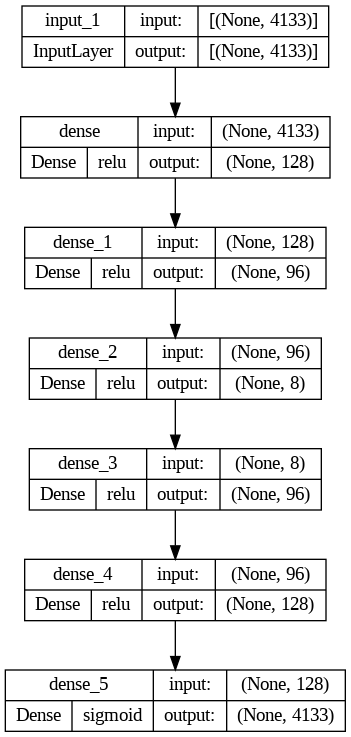

In [20]:
# Import plot_model for visualizing the best model
from tensorflow.keras.utils import plot_model

# Load the best model architecture from the tuner
autoencoder = tuner.get_best_models(num_models=1)[0]

# Display a graphical representation of the best model
plot_model(autoencoder, show_shapes=True, show_layer_activations=True)

In [21]:
# Training best architecture
history = autoencoder.fit(X_processed, X_processed, epochs=50)

Epoch 1/50
229/229 [==============================] - 5s 18ms/step - loss: 8.8612e-04 - cosine_similarity_metric: 0.8263
Epoch 2/50
229/229 [==============================] - 5s 23ms/step - loss: 8.6285e-04 - cosine_similarity_metric: 0.8325
Epoch 3/50
229/229 [==============================] - 4s 18ms/step - loss: 8.4000e-04 - cosine_similarity_metric: 0.8386
Epoch 4/50
229/229 [==============================] - 4s 17ms/step - loss: 8.1551e-04 - cosine_similarity_metric: 0.8452
Epoch 5/50
229/229 [==============================] - 5s 24ms/step - loss: 8.0069e-04 - cosine_similarity_metric: 0.8491
Epoch 6/50
229/229 [==============================] - 4s 18ms/step - loss: 7.8452e-04 - cosine_similarity_metric: 0.8530
Epoch 7/50
229/229 [==============================] - 4s 18ms/step - loss: 7.7545e-04 - cosine_similarity_metric: 0.8546
Epoch 8/50
229/229 [==============================] - 5s 23ms/step - loss: 7.6139e-04 - cosine_similarity_metric: 0.8584
Epoch 9/50
229/229 [============

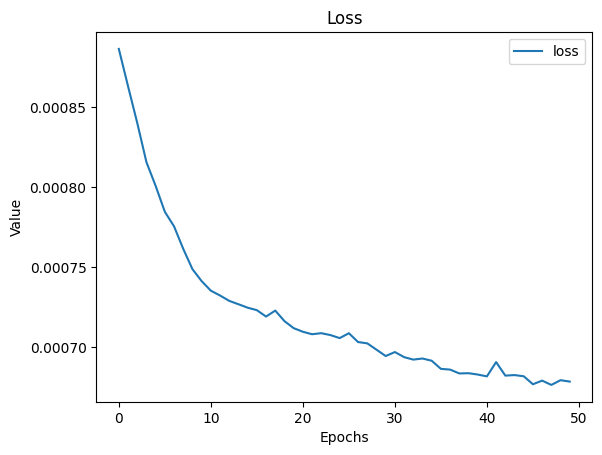

In [22]:
# Plotting loss
plt.plot(history.history['loss'], label='loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

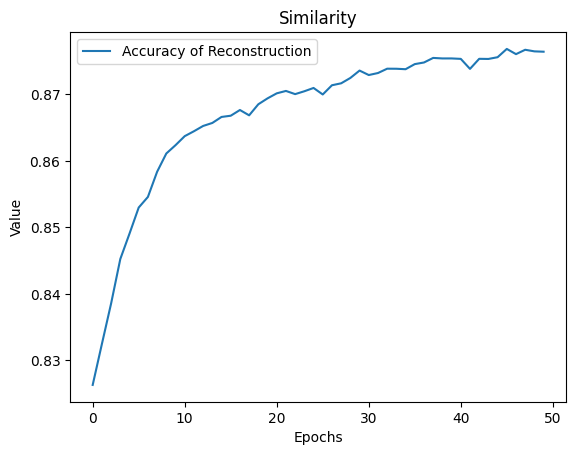

In [23]:
# Plotting cosine_similarity_metric
plt.plot(history.history['cosine_similarity_metric'], label='Accuracy of Reconstruction')
plt.title('Similarity')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

In [28]:
# Choosing a movie
movie = "Jaws"

# Getting index of a movie
movie_index = title.index[title == movie][0]

# Getting features of that movie
movie_features = X_processed[movie_index]

movie_features

array([0.65822785, 0.52885748, 1.        , ..., 0.        , 2.        ,
       0.        ])

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

# How many movies to recomend
N_movies = 10

# Generating reconstruction of features using autoencoder
reconstructed_movie = autoencoder.predict(np.array([movie_features]))[0]

1/1 [==============================] - 0s 32ms/step


In [30]:
# Comparing chosen movie to the rest
similarities = cosine_similarity(X_processed, [reconstructed_movie])
similarities[movie_index] = -1  # Making sure the original movie will not be recommended
most_similar_indices = np.argsort(similarities, axis=0)[::-1][:N_movies]  # Getting Indexes of 10 most similar movies

In [31]:
# Printing recommended movies
for recommended_movie in most_similar_indices:
    print(*title.values[recommended_movie])

Family Reunion
Team Kaylie
Best.Worst.Weekend.Ever.
The Who Was? Show
Sam & Cat
DreamWorks Holiday Classics
DreamWorks Spooky Stories
DreamWorks Happy Holidays from Madagascar
One Day at a Time
Man with a Plan
